<h1>GESIS Summer School in Survey Methodology 2018:<br> Meta-Analysis in Social Research and Survey Methodology<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Inspect-the-dataset" data-toc-modified-id="Inspect-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspect the dataset</a></span></li><li><span><a href="#Univariate-meta-analyis" data-toc-modified-id="Univariate-meta-analyis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Univariate meta-analyis</a></span></li><li><span><a href="#Publication-bias" data-toc-modified-id="Publication-bias-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Publication bias</a></span></li><li><span><a href="#Meta-regression" data-toc-modified-id="Meta-regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Meta-regression</a></span></li><li><span><a href="#Model-diagnostics" data-toc-modified-id="Model-diagnostics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model diagnostics</a></span></li><li><span><a href="#Multilevel-meta-analysis" data-toc-modified-id="Multilevel-meta-analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Multilevel meta-analysis</a></span></li></ul></div>

## Preliminaries

Please do not touch anything in this section, otherwise this notebook might not work properly. You have been warned! Also, if you have no clue what you are staring at, please consult our [Preface chapter](1-1_preface.ipynb).

In [24]:
source("run_me_first.R")

## Data

The following example can be found on Wolfgang Viechtbauer's [website](http://www.metafor-project.org/doku.php/analyses:konstantopoulos2011) and is based on a publication by Konstantopoulos (2011; which can be found on Ilias)}. The following study description is essentially copy-and-paste from Viechtbauer's website.

>The meta-analysis examines the effects of modified school calendars on student achievement. In particular, instead of following the more traditional school calendar with a long summer break (in addition to a short winter and spring break), some schools have switched to a modified school calendar comprising more frequent but shorter intermittent breaks (e.g., 9 weeks of school followed by 3 weeks off), while keeping the total number of days at school approximately the same.

>The dataset contains the results from 56 studies, each comparing the level of academic achievement in a group of students following a modified school calendar with that of a group of students following a more traditional school calendar. The difference between the two groups was quantified in terms of a standardized mean difference (*with positive values* indicating a higher mean level of achievement in the group following the modified school calendar).


## Inspect the dataset

In [25]:
## Solution.
library(metafor)
data("dat.konstantopoulos2011")

## Use a shorter name for the dataset by creating a copy.
dk <- dat.konstantopoulos2011

Use the command `head()` to inspect the dataset.

Plot of histogram of the effect sizes (`hist()`). How does the plot look like in terms of the normality assumption?

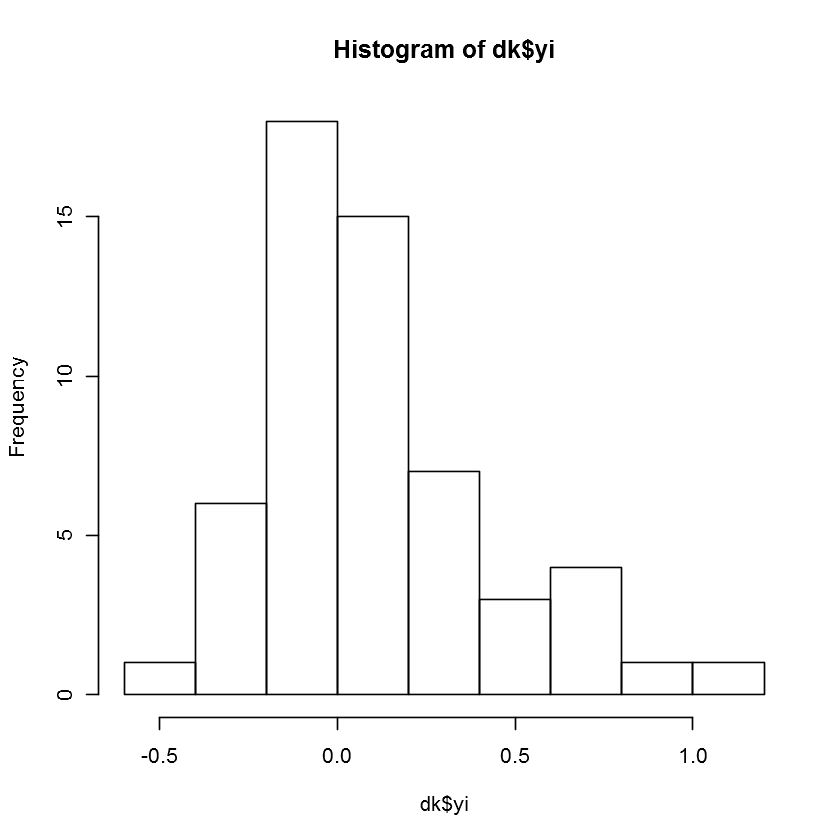

In [26]:
## Solution.
hist(dk$yi)

## Univariate meta-analyis

Estimate an overall effect size estimate. Which modell would you use and why?

In [27]:
## Solution.
(dk_rma <- rma(yi, vi, method = "REML", data = dk))


Random-Effects Model (k = 56; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.0884 (SE = 0.0202)
tau (square root of estimated tau^2 value):      0.2974
I^2 (total heterogeneity / total variability):   94.70%
H^2 (total variability / sampling variability):  18.89

Test for Heterogeneity: 
Q(df = 55) = 578.8640, p-val < .0001

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub    
  0.1279  0.0439  2.9161  0.0035  0.0419  0.2139  **

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


Draw a simple forest plot.

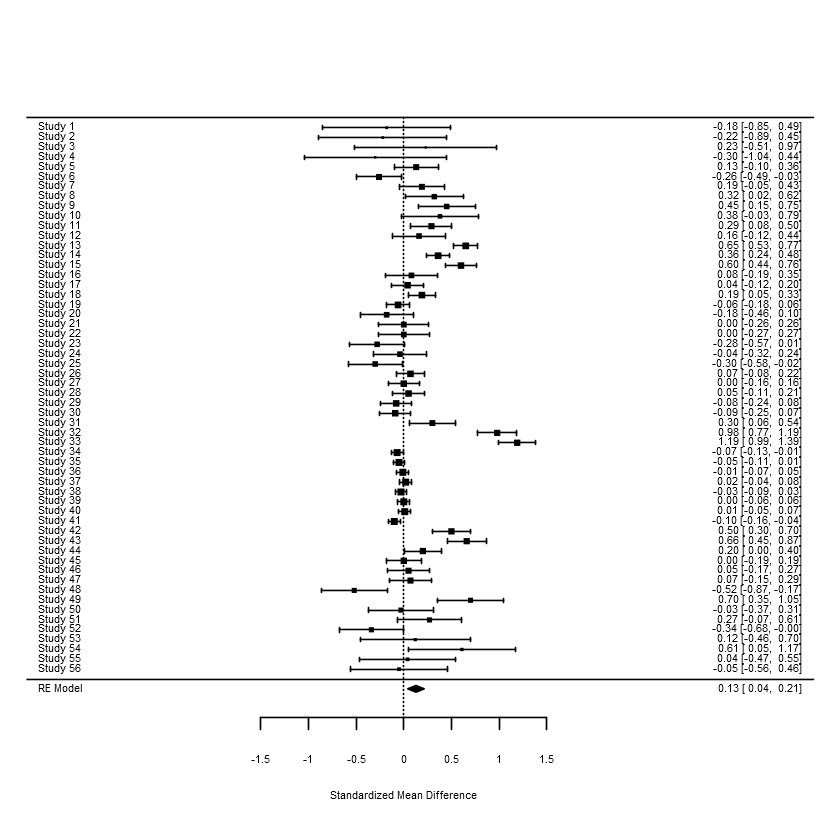

In [28]:
## Solution.
forest(dk_rma)

Draw a forest plot which is ordered by effect size.

In [29]:
## Solution.
(dk_rma_ordered <- rma(yi, vi, method = "REML", data = dk))


Random-Effects Model (k = 56; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.0884 (SE = 0.0202)
tau (square root of estimated tau^2 value):      0.2974
I^2 (total heterogeneity / total variability):   94.70%
H^2 (total variability / sampling variability):  18.89

Test for Heterogeneity: 
Q(df = 55) = 578.8640, p-val < .0001

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub    
  0.1279  0.0439  2.9161  0.0035  0.0419  0.2139  **

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


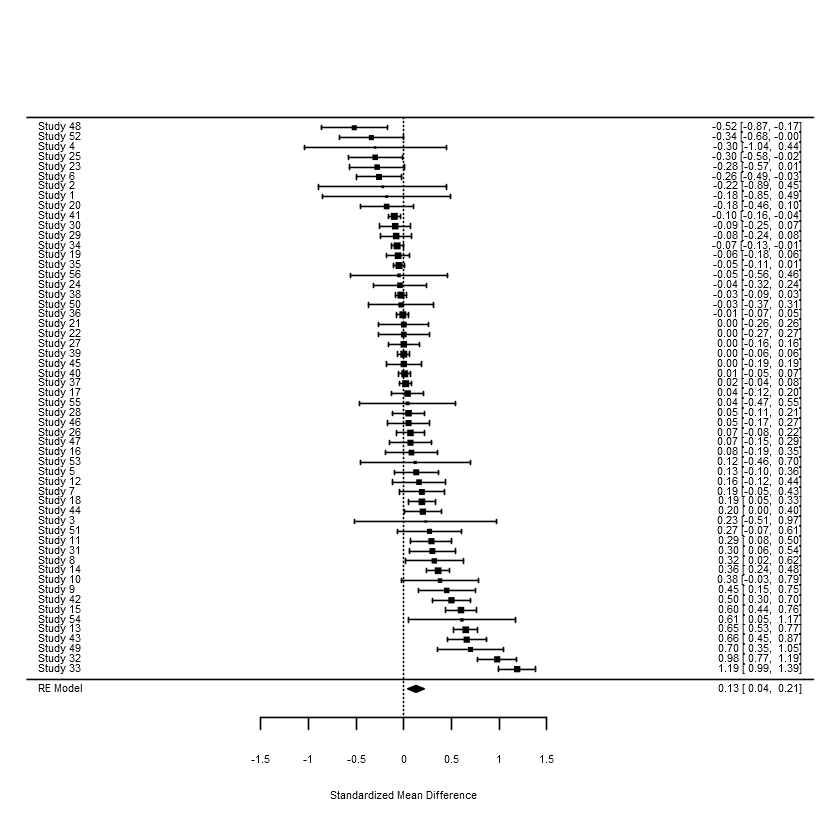

In [30]:
## Solution.
forest(dk_rma_ordered, order = "obs")

##  Publication bias

 Create a funnel plot. Does it look suspicious in terms of publication bias?

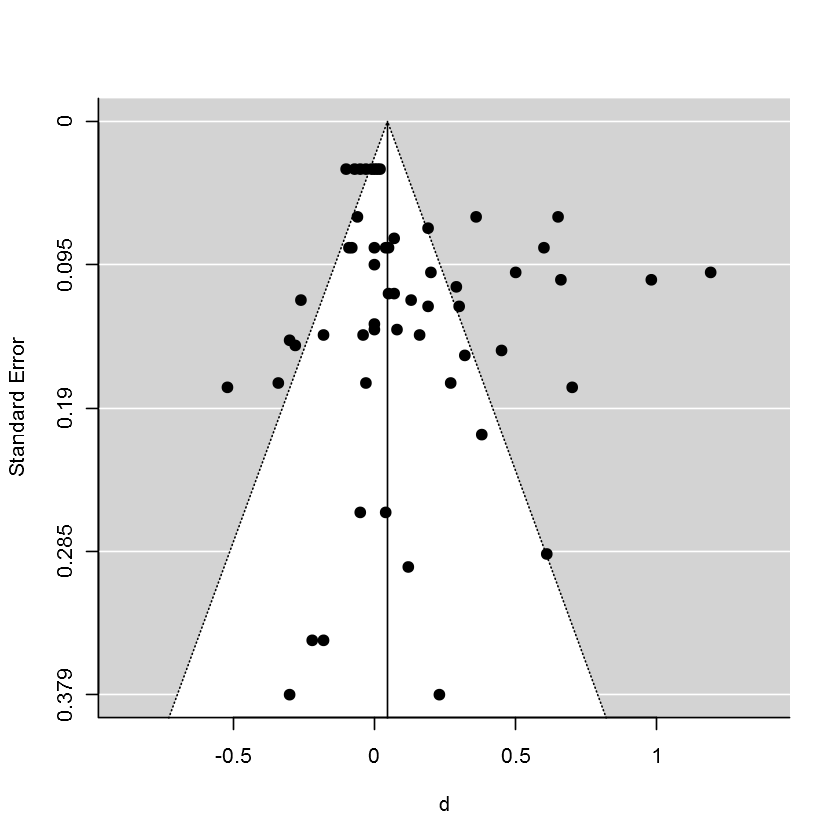

In [31]:
## Solution.
dk_fem <- rma(yi = yi, vi = vi, method = "FE", data = dk)
funnel(dk_fem, xlab = "d")

Conduct a statistical test to test for funnel plot asymmetry.

In [32]:
## Solution.
regtest(dk_fem, model = "lm")


Regression Test for Funnel Plot Asymmetry

model:     weighted regression with multiplicative dispersion
predictor: standard error

test for funnel plot asymmetry: t = 2.3543, df = 54, p = 0.0222


Explore the trim-and-fill approach.

In [33]:
## Solution.
(dk_rma_tf <- trimfill(dk_rma))


Estimated number of missing studies on the right side: 11 (SE = 4.9414)

Random-Effects Model (k = 67; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.1066 (SE = 0.0220)
tau (square root of estimated tau^2 value):      0.3265
I^2 (total heterogeneity / total variability):   95.31%
H^2 (total variability / sampling variability):  21.30

Test for Heterogeneity: 
Q(df = 66) = 916.0735, p-val < .0001

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub     
  0.2061  0.0439  4.6993  <.0001  0.1201  0.2921  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


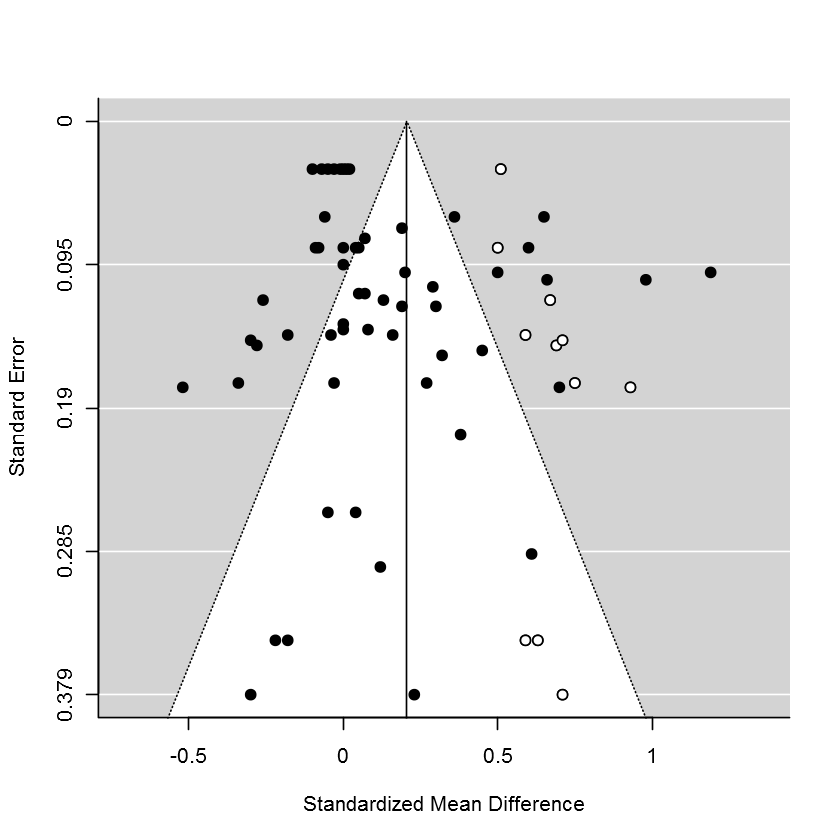

In [34]:
## Solution.
funnel(dk_rma_tf)

## Meta-regression

Investigate the impact of study year (`year`) on the effect sizes by estimating a simple meta-regression model. Create a scatterplot effect size by year.

Note: Since this dataset contains dependent effect sizes, this is not the recommended approach. See the section on multilevel meta-analysis for a more appropriate approach. 

In [35]:
## Solution.
rma(yi ~ year, vi, method = "REML", data = dk)


Mixed-Effects Model (k = 56; tau^2 estimator: REML)

tau^2 (estimated amount of residual heterogeneity):     0.0889 (SE = 0.0205)
tau (square root of estimated tau^2 value):             0.2981
I^2 (residual heterogeneity / unaccounted variability): 94.71%
H^2 (unaccounted variability / sampling variability):   18.89
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity: 
QE(df = 54) = 550.2597, p-val < .0001

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 1.3826, p-val = 0.2397

Model Results:

         estimate      se     zval    pval     ci.lb   ci.ub   
intrcpt  -10.1640  8.7529  -1.1612  0.2456  -27.3194  6.9914   
year       0.0052  0.0044   1.1758  0.2397   -0.0034  0.0138   

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


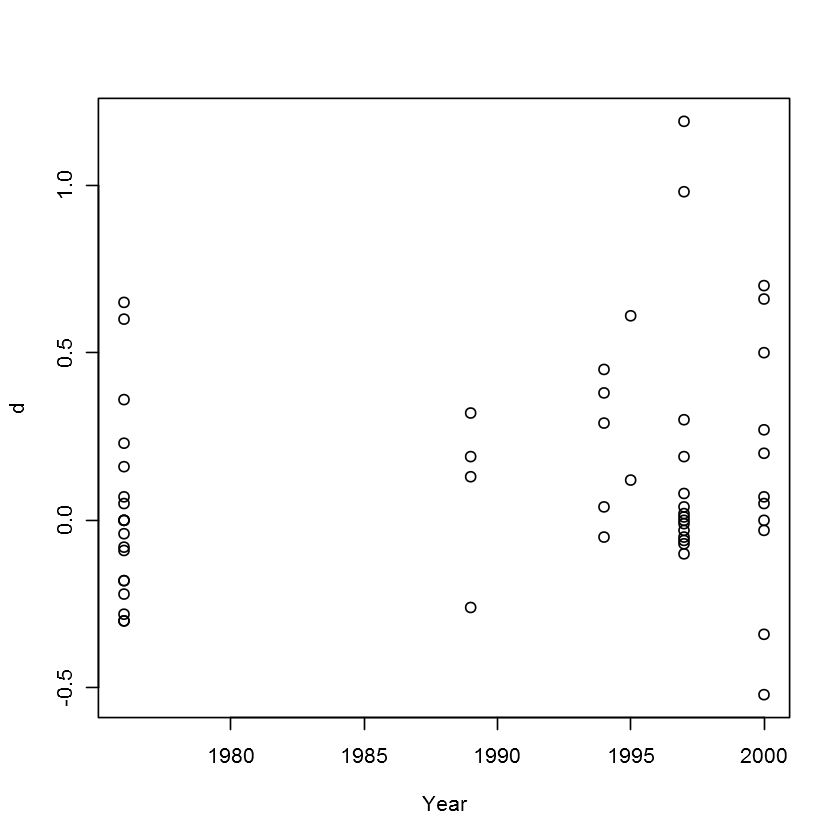

In [36]:
## Solution.
plot(dk$year, dk$yi, xlab = "Year", ylab = "d")

## Model diagnostics

Are there any influential ES estimates?

In [37]:
## Solution.
influence(dk_rma)

   rstudent  dffits cook.d  cov.r tau2.del   QE.del    hat weight    dfbs inf
1   -0.6800 -0.0657 0.0043 1.0145   0.0890 578.4293 0.0093 0.9323 -0.0656    
2   -0.7686 -0.0744 0.0055 1.0132   0.0888 578.2621 0.0093 0.9323 -0.0743    
3    0.2123  0.0202 0.0004 1.0167   0.0893 578.6298 0.0083 0.8280  0.0202    
4   -0.8910 -0.0813 0.0066 1.0100   0.0886 578.0302 0.0083 0.8280 -0.0813    
5    0.0067  0.0026 0.0000 1.0388   0.0904 578.3619 0.0188 1.8788  0.0026    
6   -1.2301 -0.1711 0.0290 1.0088   0.0874 572.1172 0.0188 1.8788 -0.1711    
7    0.1932  0.0282 0.0008 1.0377   0.0904 577.4816 0.0186 1.8606  0.0282    
8    0.5747  0.0770 0.0060 1.0296   0.0897 575.7341 0.0171 1.7117  0.0769    
9    0.9726  0.1291 0.0167 1.0190   0.0886 571.7559 0.0173 1.7271  0.1291    
10   0.6983  0.0860 0.0074 1.0230   0.0893 576.2709 0.0146 1.4643  0.0859    
11   0.5127  0.0729 0.0054 1.0344   0.0900 573.8842 0.0192 1.9162  0.0729    
12   0.0976  0.0147 0.0002 1.0365   0.0903 578.2161 0.0177 1.774

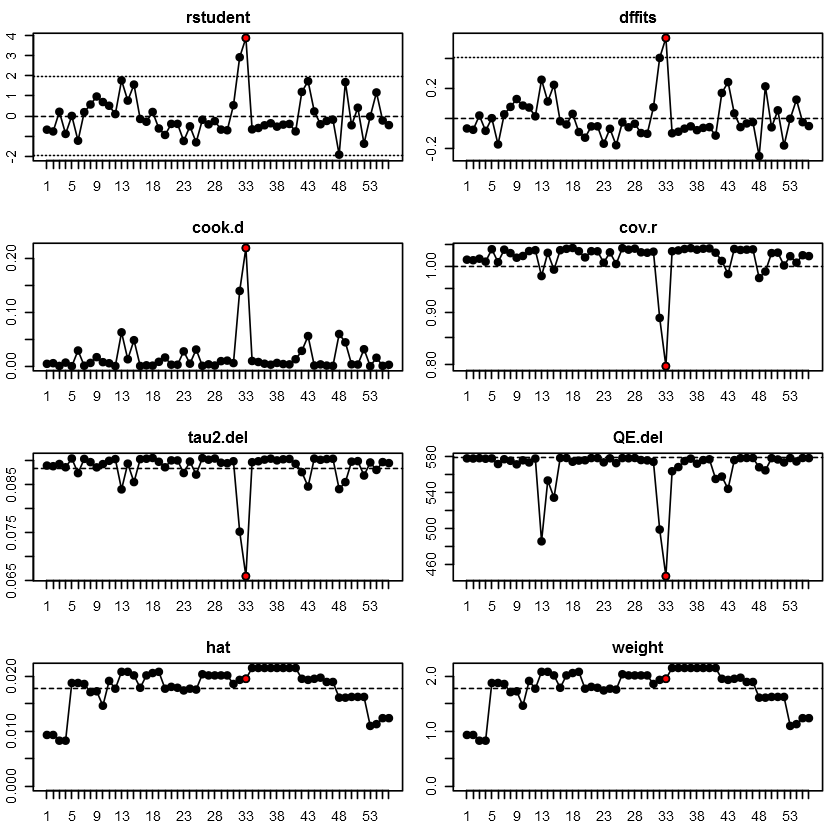

In [38]:
## Solution.
plot(influence(dk_rma))

##  Multilevel meta-analysis

The studies were conducted at various schools that were clustered within districts. The data therefore have a multilevel structure, with studies nested within districts. A multilevel meta-analysis of these data can be used to estimate and account for the amount of heterogeneity between districts and between schools within districts.

Estimate a multilevel random-effects model.

In [39]:
## Solution.
(rma_ml <- rma.mv(yi, vi, random = ~ 1 | district/study, data = dk))


Multivariate Meta-Analysis Model (k = 56; method: REML)

Variance Components: 

            estim    sqrt  nlvls  fixed          factor
sigma^2.1  0.0651  0.2551     11     no        district
sigma^2.2  0.0327  0.1809     56     no  district/study

Test for Heterogeneity: 
Q(df = 55) = 578.8640, p-val < .0001

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub   
  0.1847  0.0846  2.1845  0.0289  0.0190  0.3504  *

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


Create a profile plot.

(*) This exercise is a little more challenging in terms of R knowledge: Can you calculate the ICC (intraclass correlation coefficient). You will need the `sigma2` element within the `rma.mv` object. 

In [40]:
## Solution.
round(rma_ml$sigma2[1] / sum(rma_ml$sigma2), 3)

[1] 0.665

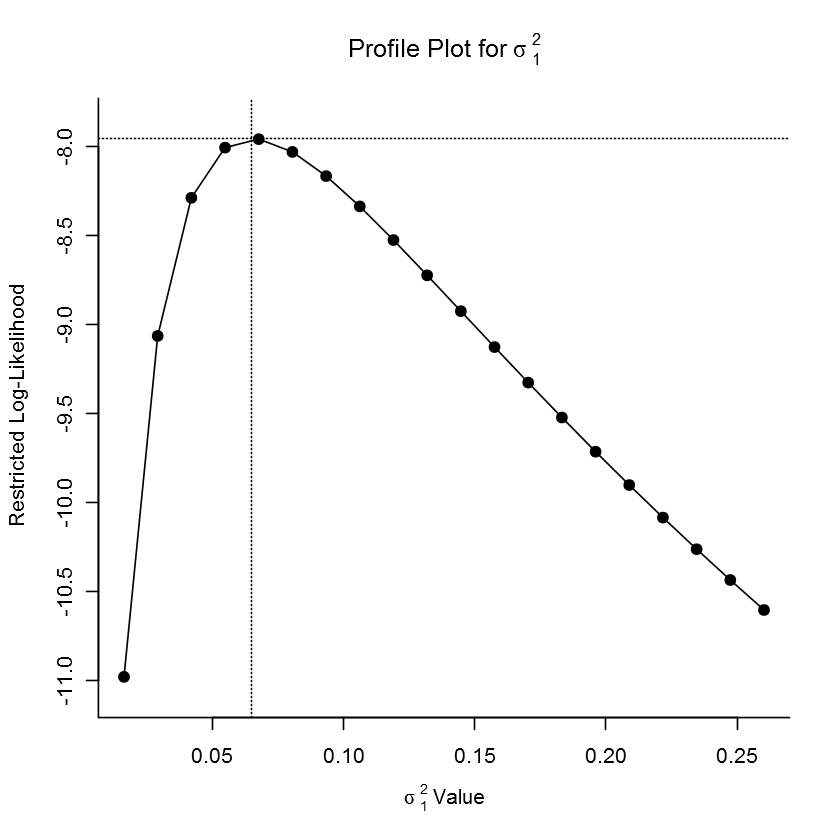

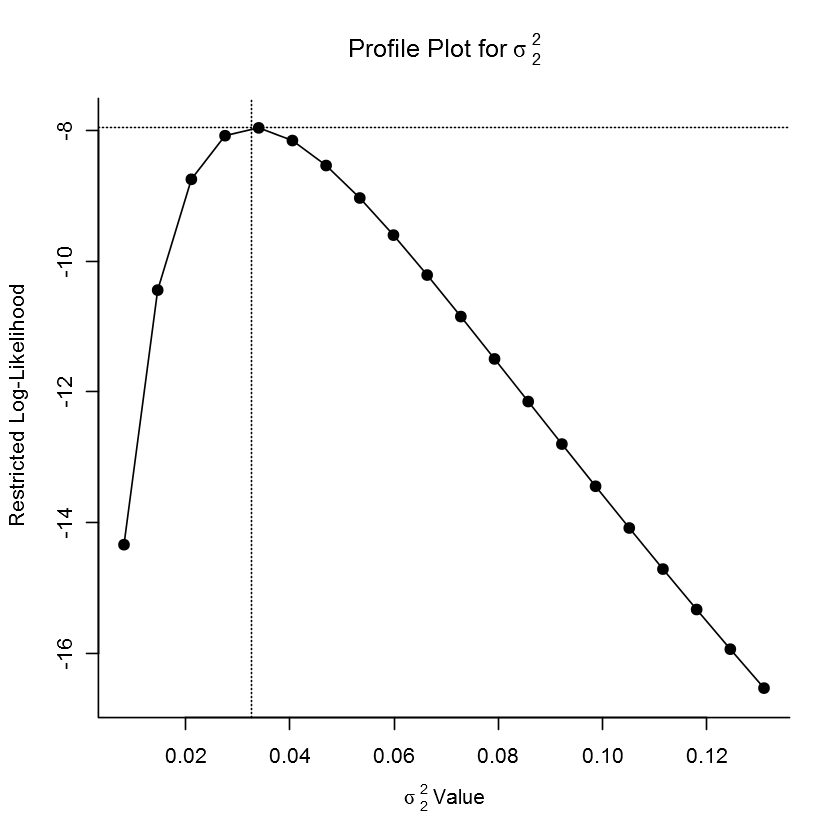

In [41]:
## Solution.
profile(rma_ml, progbar = FALSE)

Finally, we can estimate a multilevel meta-regression model by including `year`.

In [42]:
## Solution.
(rma_ml <- rma.mv(yi ~ year, vi, random = ~ 1 | district/study, data = dk))


Multivariate Meta-Analysis Model (k = 56; method: REML)

Variance Components: 

            estim    sqrt  nlvls  fixed          factor
sigma^2.1  0.0723  0.2688     11     no        district
sigma^2.2  0.0327  0.1807     56     no  district/study

Test for Residual Heterogeneity: 
QE(df = 54) = 550.2597, p-val < .0001

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 0.3169, p-val = 0.5735

Model Results:

         estimate       se     zval    pval     ci.lb    ci.ub   
intrcpt  -10.3898  18.7848  -0.5531  0.5802  -47.2074  26.4278   
year       0.0053   0.0094   0.5629  0.5735   -0.0132   0.0238   

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
